# Simulação do modelo SEIRD

O SEIRD é um modelo comportamental que é amplamente usado para a modelagem de doenças infecciosas, o modelo funciona dividindo a pupolação em grupos e mostramos o comportamento desses grupos por meio de um gráfico

Nós iremos parametrizar esses sistemas de equação, vamos selecionar os valores de acordo com pesquisas e fontes para melhor aproximar a modelagem do valor real, iremos ter os comportamentos representados em curvas e vamos plotar os valores ao final

## Modelo SEIRD

Os sistemas de equações são descritos abaixo:

<img src="images/modelo.png">

$\displaystyle \frac{dS}{dt} = -\frac{\beta S I}{N}$<br><br>
$\displaystyle \frac{dE}{dt} = \frac{\beta S I}{N} - \sigma E$<br><br>
$\displaystyle \frac{dI}{dt} = \sigma E -  \gamma I - \mu I$<br><br>
$\displaystyle \frac{dR}{dt} = \gamma I$<br><br>
$\displaystyle \frac{dD}{dt} = \mu I$<br><br>
$N = S + E + I + R + D$<br><br>

Onde temos as seguintes constantes:<br><br>

$\beta$: Taxa de transmissão dos infectados<br><br>
$\sigma$: Taxa de incubação do individuos (Duração média da incubação $1/\sigma$)<br><br>
$\gamma$: Taxa de recuperação dos infectados $\gamma$ = 1/duração<br><br>
$\mu$: Taxa de mortalidade

## Módulos e importações:

* Numpy: Biblioteca de python para nos ajudar a resolve os cálculos complexos

* Matplolib: Biblioteca usada para plotar o gŕafico ao final

* Scipy: Biblioteca que usamos para resolver os sistemas de equações


In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Função com os sistemas de equações

Implementação em python das equações descritas acima.

In [204]:
def deriv(y, t, N, beta, sigma, gamma, mu):
  S, E, I, R, D = y

  dSdt = -beta* S*I/N
  dRdt = gamma * I
  dIdt = sigma*E - gamma*I - mu*I
  dEdt = beta*S*I/N - sigma*E
  dDdt = mu*I
  
  return [dSdt, dEdt, dIdt, dRdt, dDdt]



### Condições iniciais do modelo:

Nesse exemplo vamos tentar simular o contágio em pernambuco, usamos a população de pernambuco e os dois primeiros casos relatados, e uma estimativa que esses 2 casos expuseram 6 pessoas, um indice r0 com 2.81 que foi o pico da transmissão no inicio da pandemia relatado em abril/2020, executamos a projeção em 200 dias, aproximadamente 7 meses após o primeiro caso comfirmado em PE

#### Gráfico do avanço da doença:

<img src="images/covid_pernambuco.png">

In [205]:
# N: Numero Total
# I: Infectados
# E: Expostos
# S: Sucetíveis
# R: Recuperados
# D: Mortos
# beta: taxa de transmissão
# sigma: taxa de incubação (1/sigma)
# gamma: chance de recuperação (1/duração)
# mu: taxa de mortalidade

# População de Pernambuco
N = 9616621

# Valores iniciais
I0 = 2
E0 = 6
R0 = 0
D0 = 0
S0 = N - (I0 + R0 + D0 + E0)

r0 = 2.81
gamma = 1/5.2
sigma = 1/2.9

mu = 0.034
beta = r0 * gamma

days = 200

t = np.linspace(0,days,days)


In [206]:

y0 = S0, E0, I0, R0, D0

ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma, mu))

S, E, I, R, D = ret.T

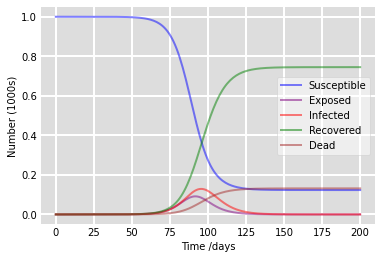

In [207]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(t, S/N, 'blue', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t, E/N, 'purple', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(t, I/N, 'red', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t, R/N, 'green', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(t, D/N, 'brown', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()



### Progressão da doença com números atuais:

Aqui temos uma tentativa de estimar a progressão atual da doença no estado, alterando os parâmetros iniciais de infectados, recuperados e mortos, e avaliar como se dá esse comportamento, foi usado o r0 padrão do brasil pela falta de dados especificos

In [208]:
# População de Pernambuco
N = 9616621

# Valores iniciais
I0 = 166540
E0 = 0
R0 = 147843
D0 = 8740
S0 = N - (I0 + R0 + D0 + E0)

r0 = 1.4
sigma = 1/5.2
gamma = 1/2.9
mu = 0.034
beta = r0 * gamma

days = 200

t = np.linspace(0,days,days)


In [209]:
y0 = S0, E0, I0, R0, D0
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma, mu))
S, E, I, R, D = ret.T

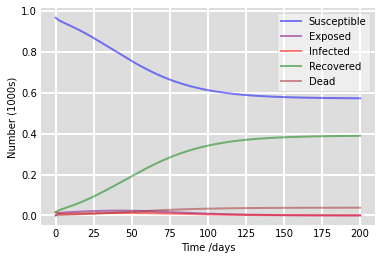

In [210]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(t, S/N, 'blue', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t, E/N, 'purple', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(t, I/N, 'red', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t, R/N, 'green', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(t, D/N, 'brown', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

### Progressão Sergipe

Aproveitando o projeto decidi incluir dados para simulação no meu estado natal, segue os resultados e um gráfico da progressão no estado

<img src="images/covid_sergipe.png">

In [211]:
# População de Sergipe
N = 2318822

# Valores iniciais
I0 = 85477
E0 = 0
R0 = 78248
D0 = 2244
S0 = N - (I0 + R0 + D0 + E0)

r0 = 1.4
sigma = 1/5.2
gamma = 1/2.9
mu = 0.034
beta = r0 * gamma

days = 200

t = np.linspace(0,days,days)

In [212]:
y0 = S0, E0, I0, R0, D0
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma, mu))
S, E, I, R, D = ret.T

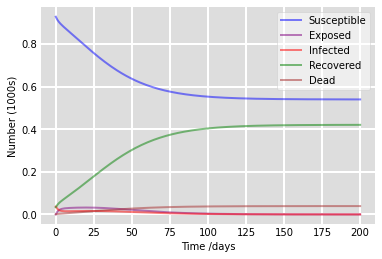

In [213]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(t, S/N, 'blue', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(t, E/N, 'purple', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(t, I/N, 'red', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(t, R/N, 'green', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(t, D/N, 'brown', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

*** Referências: ***

1. Taxa de transmissão da Covid-19 no Brasil mantém estabilidade, mas apresenta leve oscilação para cima. G1. <https://g1.globo.com/bemestar/coronavirus/noticia/2020/08/25/taxa-de-transmissao-da-covid-19-no-brasil-sobe-levemente-uma-semana-depois-de-indicar-queda-aponta-imperial-college.ghtml>.

2. Pernambuco | Cidades e Estados | IBGE. Ibge.gov.br. Disponível em: <https://www.ibge.gov.br/cidades-e-estados/pe.html>.

3. Casal do Recife são primeiros casos de coronavírus em Pernambuco. <https://www.folhape.com.br/noticias/casal-do-recife-sao-primeiros-casos-de-coronavirus-em-pernambuco/133219/>.

4. Estimativas de R(t) por Estados do Brasil. covid19. Disponível em: <https://flaviovdf.github.io/covid19/>.

5. FENTRANSPORTE. A evolução epidêmica do COVID-19 – Modelo SIR. GDISPEN. Disponível em: <https://wp.ufpel.edu.br/fentransporte/2020/04/09/a-evolucao-epidemica-do-covid-19-modelo-sir/>.

6. Sergipe | Cidades e Estados | IBGE. Ibge.gov.br. Disponível em: <https://www.ibge.gov.br/cidades-e-estados/se.html>.

7. Governo de Sergipe. Todos contra o Corona | Governo de Sergipe. Disponível em: <https://todoscontraocorona.net.br/>.

8. Simulating Compartmental Models in Epidemiology using Python & Jupyter Widgets. Medium. Disponível em: <https://towardsdatascience.com/simulating-compartmental-models-in-epidemiology-using-python-jupyter-widgets-8d76bdaff5c2>.

‌